### Example 1: List Comprehensions

Certain routines are integral to solving almost all programming problems. Here is an example of one such routine:  

```python 
old_list = [item_1, item_2, ..... , item_n]
new_list = []
for item in old_list:
    new_item = do_something_to(item)
    new_list.append(new_item)
```

This routine is so ubiquitous that the notation given above can become cumbersome, especially in larger projects. For this reason, python allows us to use a notational shortcut called **_list comprehensions_**. Consider the following example:

In [2]:
numbers = [1,2,3,4,5,6,7,8,9,10]
squares = []
for n in numbers:
    squares.append(n**2)
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


List comprehensions provide an equivalent way to construct the squares lists as follows:

In [18]:
numbers = [1,2,3,4,5,6,7,8,9,10]
squares = [n**2 for n in numbers]
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


Just like with a regular "for-loop", we can also add conditions to our list comprehensions. For example, this code:

In [4]:
from math import sqrt
numbers = [1,2,3,4,5,6,7,8,9,10]

int_square_roots = []
for n in numbers:
    # Check for perfect squares
    if sqrt(n) == int(sqrt(n)):
        int_square_roots.append(sqrt(n))
        
print(int_square_roots)

[1.0, 2.0, 3.0]


is equivalent to this code:

In [5]:
from math import sqrt
numbers = [1,2,3,4,5,6,7,8,9]

int_square_roots = [sqrt(n) for n in numbers if sqrt(n) == int(sqrt(n))]
print(int_square_roots)

[1.0, 2.0, 3.0]


### Example 2: Set Comprehensions

The comprehension construction does not end with lists. We can also use comprehension notation to construct other containers like sets. Again, we will start with a basic loop:

In [19]:
numbers = [1,2,3,4,5,1,2,3,4,5]
distinct_squares = set()

for n in numbers:
    distinct_squares.add(n**2)
    
print(distinct_squares)    

{1, 4, 9, 16, 25}


Equivalently, we can express this loop as a comprehension:

In [21]:
numbers = [1,2,3,4,5,1,2,3,4,5]
distinct_squares = set(n**2 for n in numbers)
print(distinct_squares)

{1, 4, 9, 16, 25}


### Example 3: Dictionary Comprehensions

As with sets and lists, we can also use a comprehension to construct a dictionary. Once again, we see that this loop:

In [7]:
old_dict = {'a':1,'b':2,'c':3,'d':4,'e':5}
new_dict = {}

for key, value in old_dict.items():
    new_dict[key] = value**2
    
print(new_dict)

{'a': 1, 'b': 4, 'c': 9, 'd': 16, 'e': 25}


is equivalent to this dictionary comprehension:

In [8]:
old_dict = {'a':1,'b':2,'c':3,'d':4,'e':5}
new_dict = dict((key, value**2) for key, value in old_dict.items())
print(new_dict)

{'a': 1, 'b': 4, 'c': 9, 'd': 16, 'e': 25}


### Example 4: Zip and Enumerate

The final two standard library tools we will explore are called `zip` and `enumerate`. Both of these tools can be used to pair up the elements of two lists which have the same length. While zip can be used to pair up the elements of any two lists, enumerate will alway pair up the elements of a list with their indices. Let's look at some examples. 


First, here is a simple use of `zip`

In [9]:
group_names = ['Adam', 'Sarah', 'John', 'Anna', 'Jack']
group_scores = [85,75,65,100,80]
for name, score in zip(group_names, group_scores):
    print(name, score)

Adam 85
Sarah 75
John 65
Anna 100
Jack 80


Next, we see that `enumerate` works the same way:

In [10]:
group_names = ['Adam', 'Sarah', 'John', 'Anna', 'Jack']
for index, name in enumerate(group_names):
    print(index, name)

0 Adam
1 Sarah
2 John
3 Anna
4 Jack


Notice that although we only gave a single list as an input to enumerate, it outputs both an index and an element of the list at each iteration of our loop. We catch these two outputs at each step with the variables 'index' and 'name'. Since enumerate is a special case of zip, we could have written the following equivalent piece of code instead:

In [11]:
group_names = ['Adam', 'Sarah', 'John', 'Anna', 'Jack']
group_index = list(range(len(group_names)))
for index, name in zip(group_index, group_names):
    print(index, name)

0 Adam
1 Sarah
2 John
3 Anna
4 Jack


In general, it's probably best not to use `zip` in this way. Use `enumerate` when you want to pair the items of a list to their indices instead of creating a list of indices explicitly. If you want to pair up the elements of two different lists, then use `zip`.

### Example 5: Constructing Containers with Zip and Enumerate

One especially common application of `zip` and `enumerate` is to help convert multiple lists into a more complicated container. We saw in example 3 that comprehensions make it easy to construct dictionaries from other dictionaries. Now, let's see how we can use dictionary comprehensions together with `zip` or `enumerate` to construct a dictionary from two lists.

In [12]:
group_names = ['Adam', 'Sarah', 'John', 'Anna', 'Jack']
group_scores = [85,75,65,100,80]

my_dict = dict((name, score) for name, score in zip(group_names,group_scores))
print(my_dict)

{'Adam': 85, 'Sarah': 75, 'John': 65, 'Anna': 100, 'Jack': 80}


The above example is written in the usual comprehension format which we saw in the first three examples. However, `dict` will also allow us to pass in a `zip` object directly:

In [13]:
group_names = ['Adam', 'Sarah', 'John', 'Anna', 'Jack']
group_scores = [85,75,65,100,80]

my_dict = dict(zip(group_names,group_scores))
print(my_dict)

{'Adam': 85, 'Sarah': 75, 'John': 65, 'Anna': 100, 'Jack': 80}


We can also pass an `enumerate` object directly to `dict`. This can be especially useful for using dictionaries with a `map`. One common example is in the case of a colormap, where integers are mapped to colors. Here is an example:

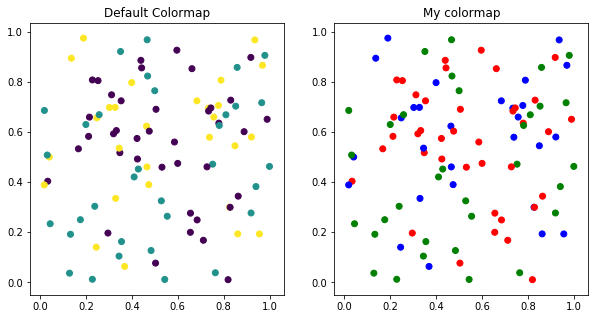

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.random(100)
y = np.random.random(100)
c = np.random.randint(0,3,100)

## Plotting without a colormap ##
fig, ax = plt.subplots(ncols = 2, figsize=(10,5))
ax[0].scatter(x,y,c=c)
ax[0].set_title('Default Colormap')

## Create a colormap, then map the ints in 'c' to the names of the colors we want ##
colors = ['red', 'green', 'blue']
my_cmap = dict(enumerate(colors))
rgb = list(map(lambda x: my_cmap[x], c))

## Plotting after the colormap ##
ax[1].scatter(x,y,c=rgb)
ax[1].set_title('My colormap')
plt.show()

### Example 6: Numpy Stack

Finally, we will explore a function from the numpy library called `stack`. The `stack` function applied along the y-axis (1-axis) has essentially the same function as `zip`. The main reason to use `stack` is when you are working with numpy arrays and you want all of your objects to stay numpy arrays. Here is a simple usage example:

In [83]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = a**2
c = np.stack((a,b), axis=0)
print('Stacked along axis 0: \n\n', c, '\n')
c = np.stack((a,b), axis=1)
print('Stacked along axis 1: \n\n', c, '\n')

Stacked along axis 0: 

 [[  1   2   3   4   5   6   7   8   9  10]
 [  1   4   9  16  25  36  49  64  81 100]] 

Stacked along axis 1: 

 [[  1   1]
 [  2   4]
 [  3   9]
 [  4  16]
 [  5  25]
 [  6  36]
 [  7  49]
 [  8  64]
 [  9  81]
 [ 10 100]] 

